In [1]:
%matplotlib inline

In [2]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM


/content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pip install quaternionic
!pip install pykeops[colab] > install.log

In [24]:
# Import  integrators
from projects.rkhs_lifting.src.integrators.base.sd60 import SD60
from projects.rkhs_lifting.src.integrators.base.sd300 import SD300
from projects.rkhs_lifting.src.integrators.base.sd1821 import SD1821
from projects.rkhs_lifting.src.integrators.base.refined_sd import Refined_SD
from projects.rkhs_lifting.src.integrators import RKHS_Density_Integrator

# Import kernel
from projects.rkhs_lifting.src.kernels.rescaled_cosine import Rescaled_Cosine_Kernel

# Test constuctor
base_integrator = SD300()
resolution = np.pi/5
refined_integrator = Refined_SD(base_integrator=base_integrator,resolution=resolution)
radius = 2 * resolution
kernel = Rescaled_Cosine_Kernel(quaternions=refined_integrator.quaternions,radius=radius)

rkhs_integrator = RKHS_Density_Integrator(base_integrator=refined_integrator,kernel=kernel)


1.5525580758473128
2.0


Number of angles = 21775


/usr/local/lib/python3.7/dist-packages/scipy/spatial/transform/rotation.py:135: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  warnings.warn("Gimbal lock detected. Setting third angle to zero since"


Text(0.5, 0, '$\\psi$')

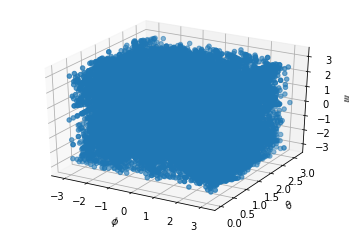

In [25]:
# Plot meshed points for different mesh densities

angles = rkhs_integrator.angles

x = angles[:, 0]
y = angles[:, 1]
z = angles[:, 2]
print("Number of angles = {}".format(len(x)))

fig = plt.figure()
ax = fig.gca(projection='3d')

img = ax.scatter(x, y, z)
ax.set_xlabel("$\phi$")
ax.set_ylabel("$\\theta$")
ax.set_zlabel("$\psi$")
